<a href="https://colab.research.google.com/github/SanaSNavas7/Machine-Learning/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82565 entries, 0 to 82564
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               82565 non-null  object 
 1   age                  82565 non-null  float64
 2   hypertension         82565 non-null  int64  
 3   heart_disease        82565 non-null  int64  
 4   smoking_history      82565 non-null  object 
 5   bmi                  82565 non-null  float64
 6   HbA1c_level          82565 non-null  float64
 7   blood_glucose_level  82565 non-null  int64  
 8   diabetes             82564 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 5.7+ MB


In [ ]:
print(df.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [ ]:
# Check for missing values
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
summary_stats = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].agg(['mean', 'median', 'std'])
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
               age        bmi  HbA1c_level  blood_glucose_level
mean    41.885856  27.320767     5.527507           138.058060
median  43.000000  27.320000     5.800000           140.000000
std     22.516840   6.636783     1.070672            40.708136


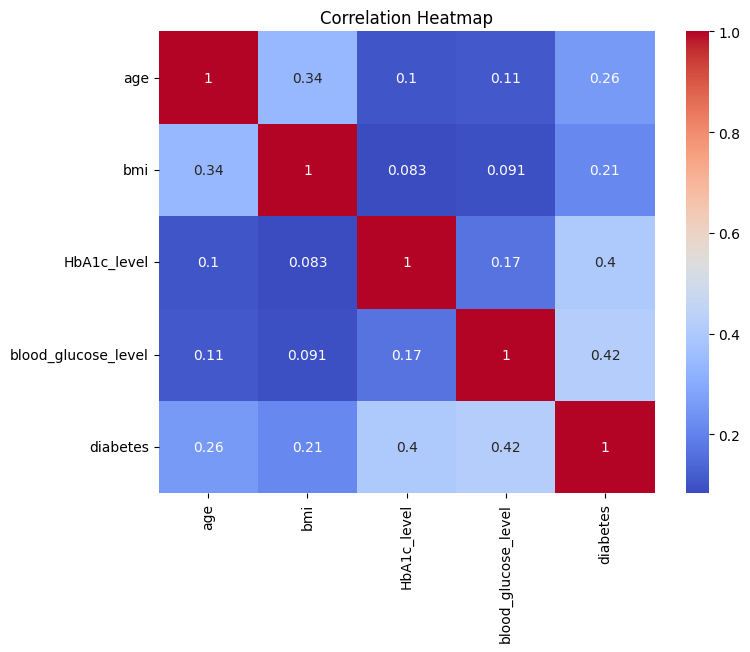

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

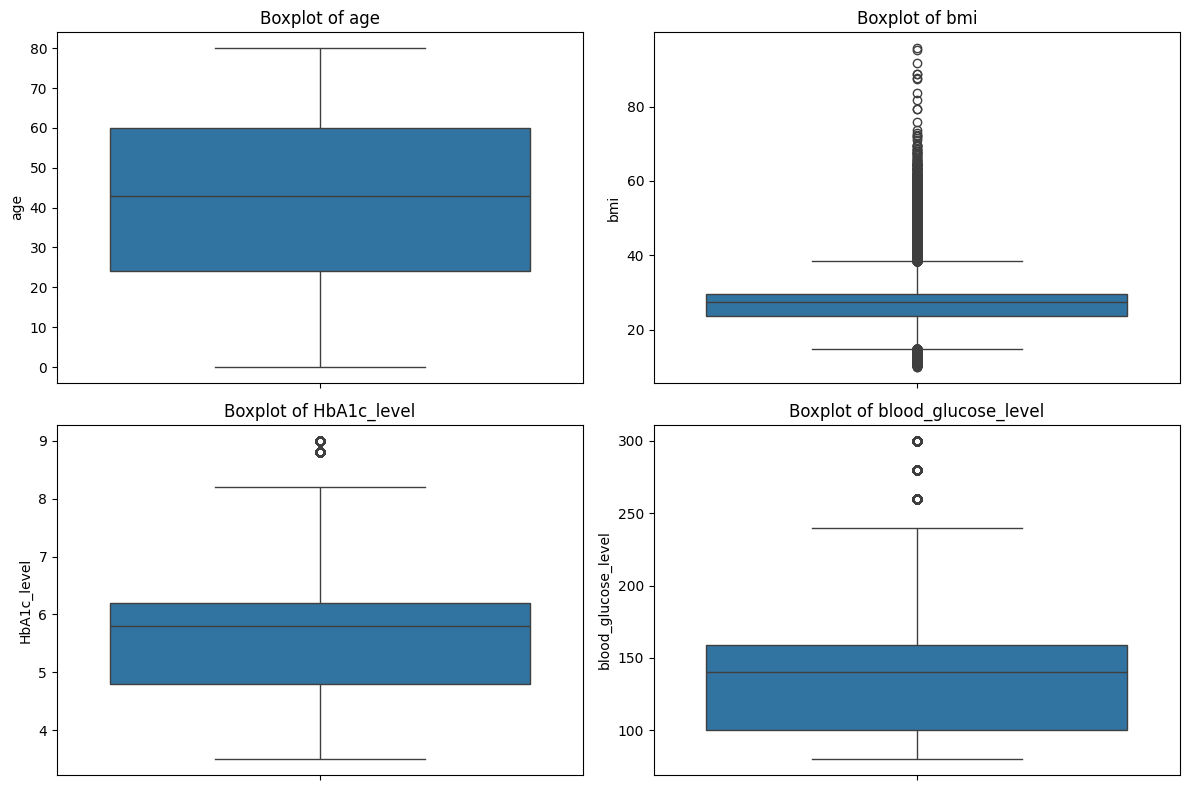

In [ ]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

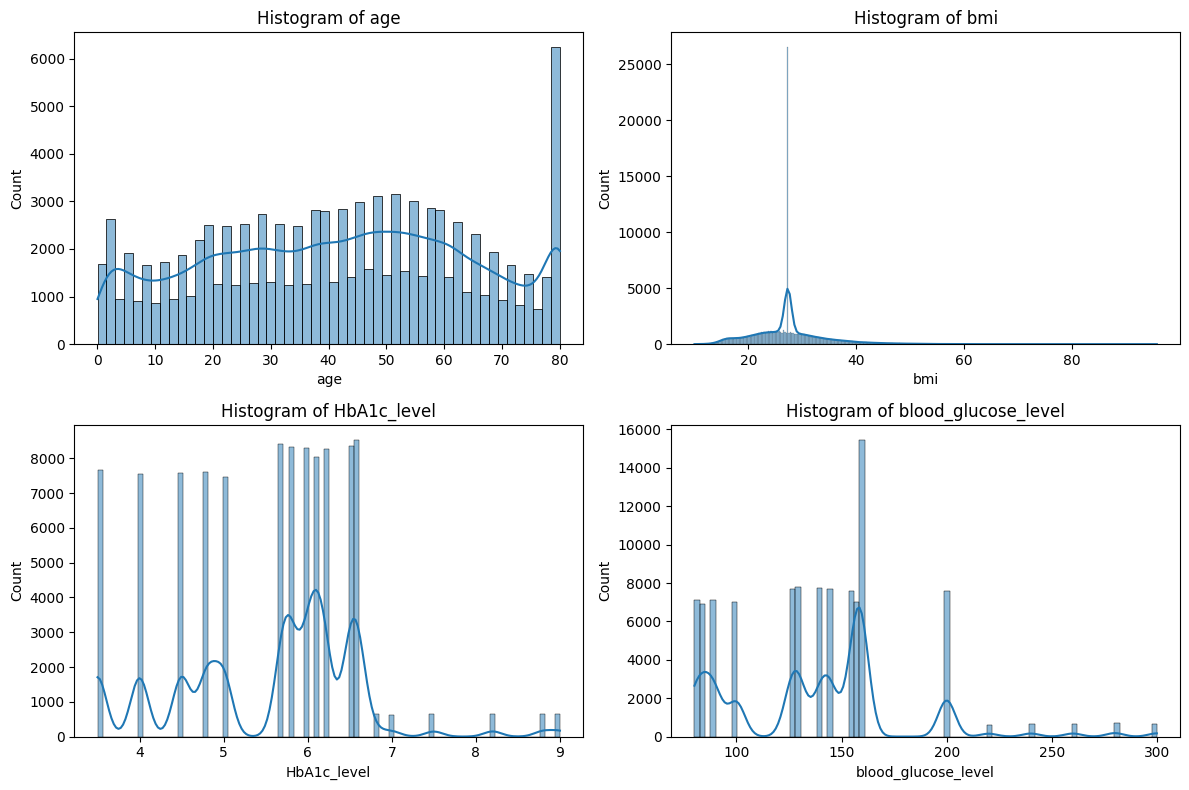

In [ ]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f"Histogram of {column}")
plt.tight_layout()
plt.show()

In [ ]:
df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['smoking_history'] = LabelEncoder().fit_transform(df['smoking_history'])

In [ ]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

CORRELATION MATRIX

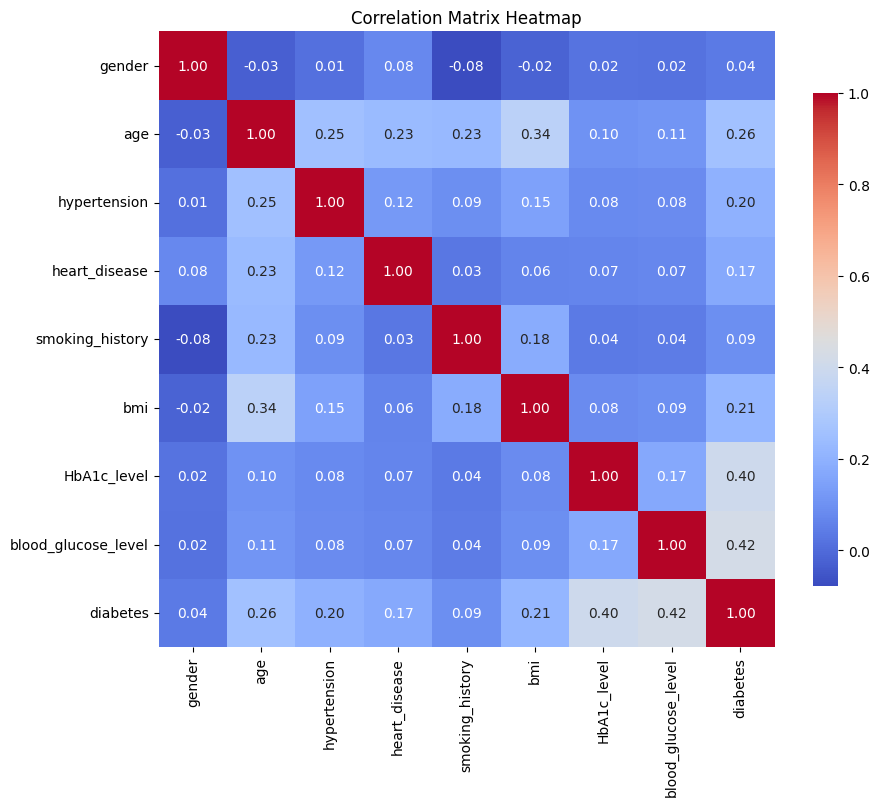

In [ ]:
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Title and display
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(X_train[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])
X_test[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.transform(X_test[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])


RANDOM FOREST CLASSIFIER

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

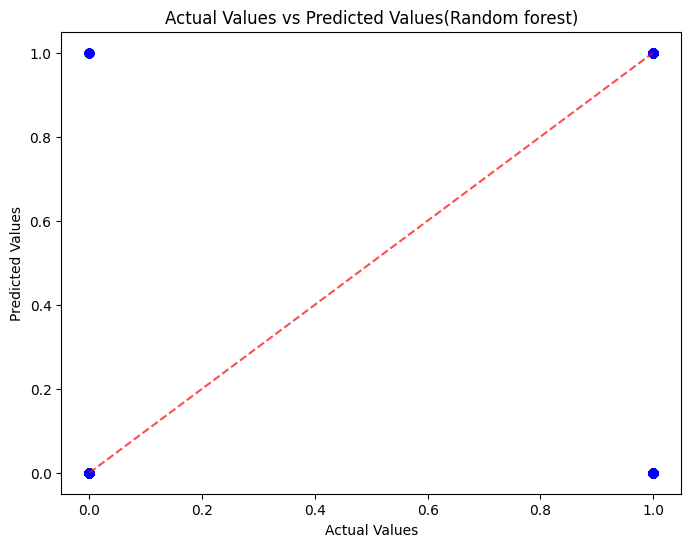

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color="blue", alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs Predicted Values(Random forest)")
# Diagonal line representing perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", alpha=0.7, linestyle='--')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.97075

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000


Confusion Matrix:
 [[18234    58]
 [  527  1181]]


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

In [ ]:
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           scoring='accuracy',  # Change as needed
                           cv=5,  # 5-fold cross-validation
                           verbose=1,  # Display progress
                           n_jobs=-1)  # Use all available cores

GRADIENT BOOSTING CLASSIFIER

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred_gb = gb_model.predict(X_test)


In [ ]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],               # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],            # Step size shrinkage
    'max_depth': [3, 5, 7],                       # Maximum depth of the individual estimators
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                # Minimum number of samples required to be at a leaf node
}


In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gb_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,  # 5-fold cross-validation
                           verbose=1,  # Print progress
                           n_jobs=-1)  # Use all available cores


In [ ]:
# Fit to the training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


In [ ]:
# Best parameters from grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Best model
best_model = grid_search.best_estimator_


In [ ]:
# Predictions with the best model
y_pred_gb = best_model.predict(X_test)

# Evaluation
print("Gradient Boosting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


In [ ]:
# Evaluation
print("Gradient Boosting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Classifier
Accuracy: 0.97245

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.69      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000


Confusion Matrix:
 [[18277    15]
 [  536  1172]]


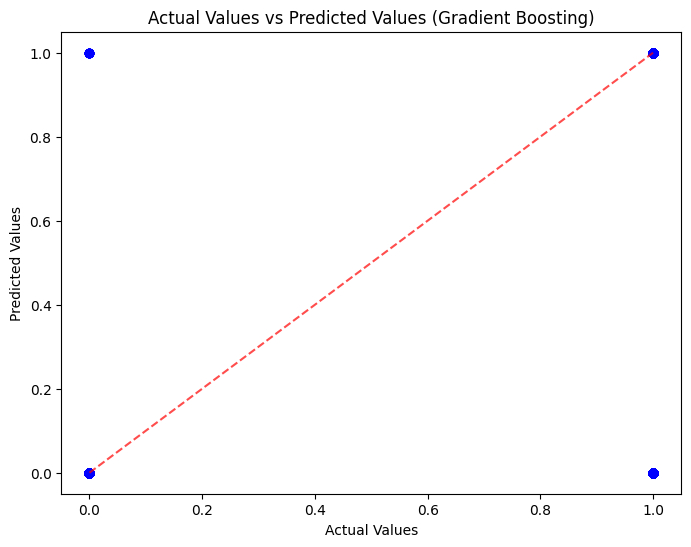

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, color="blue", alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs Predicted Values (Gradient Boosting)")
# Diagonal line representing perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", alpha=0.7, linestyle='--')
plt.show()

FEATURE IMPORTANCE


Feature Importances:
 HbA1c_level            0.637591
blood_glucose_level    0.320845
age                    0.024220
bmi                    0.009748
hypertension           0.003941
heart_disease          0.002582
smoking_history        0.000819
gender                 0.000254
dtype: float64


<Axes: title={'center': 'Gradient Boosting Feature Importances'}>

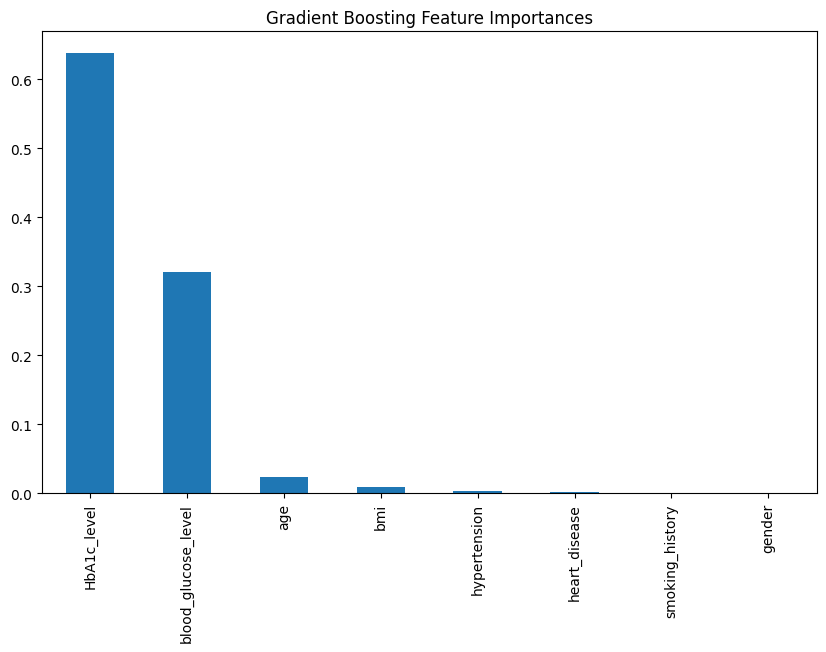

In [ ]:
# Feature Importances
importances_gb = pd.Series(gb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances:\n", importances_gb)
importances_gb.plot(kind='bar', figsize=(10, 6), title="Gradient Boosting Feature Importances")

SUPPORT VECTOR MACHINE CLASSIFIER

In [ ]:

from sklearn.svm import SVC


In [ ]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
y_pred_svm = svm_model.predict(X_test)

In [ ]:
print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Support Vector Machine
Accuracy: 0.9622

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.99      0.56      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.98      0.78      0.85     20000
weighted avg       0.96      0.96      0.96     20000


Confusion Matrix:
 [[18282    10]
 [  746   962]]


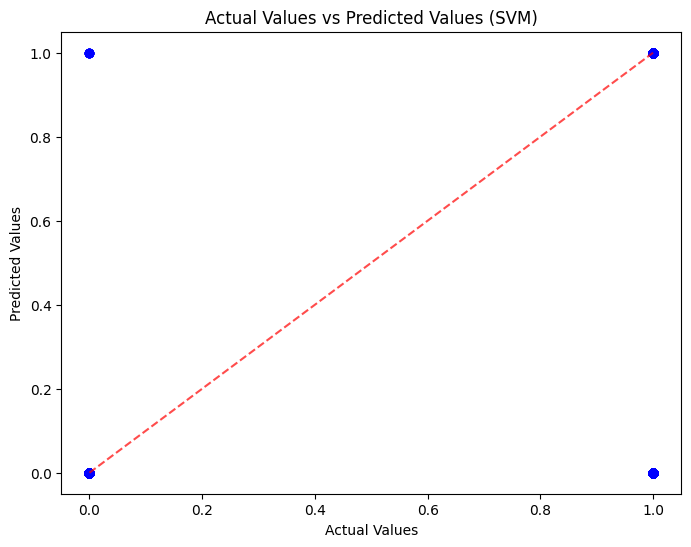

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svm, color="blue", alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs Predicted Values (SVM)")
# Diagonal line representing perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", alpha=0.7, linestyle='--')
plt.show()

K NEIGHBORS CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn_model.predict(X_test)

In [ ]:
print("K-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

K-Nearest Neighbors
Accuracy: 0.96085

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.90      0.61      0.73      1708

    accuracy                           0.96     20000
   macro avg       0.93      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000


Confusion Matrix:
 [[18171   121]
 [  662  1046]]


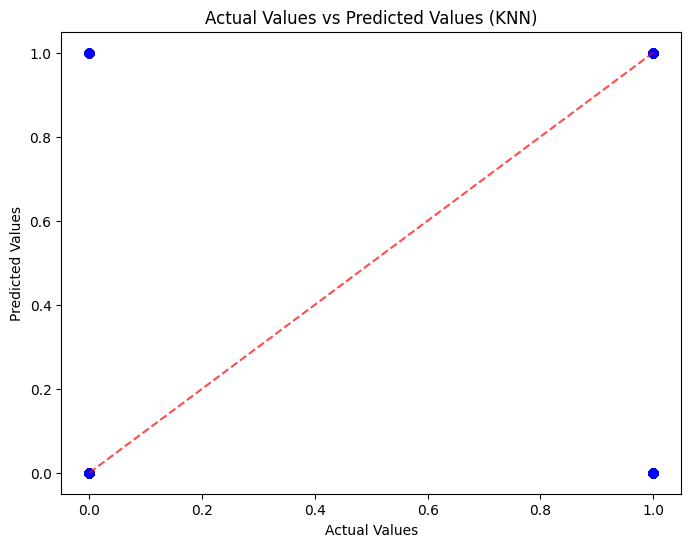

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color="blue", alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs Predicted Values (KNN)")
# Diagonal line representing perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", alpha=0.7, linestyle='--')
plt.show()

NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = nb_model.predict(X_test)

In [ ]:
print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naive Bayes
Accuracy: 0.90475

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95     18292
           1       0.46      0.64      0.53      1708

    accuracy                           0.90     20000
   macro avg       0.71      0.78      0.74     20000
weighted avg       0.92      0.90      0.91     20000


Confusion Matrix:
 [[17005  1287]
 [  618  1090]]


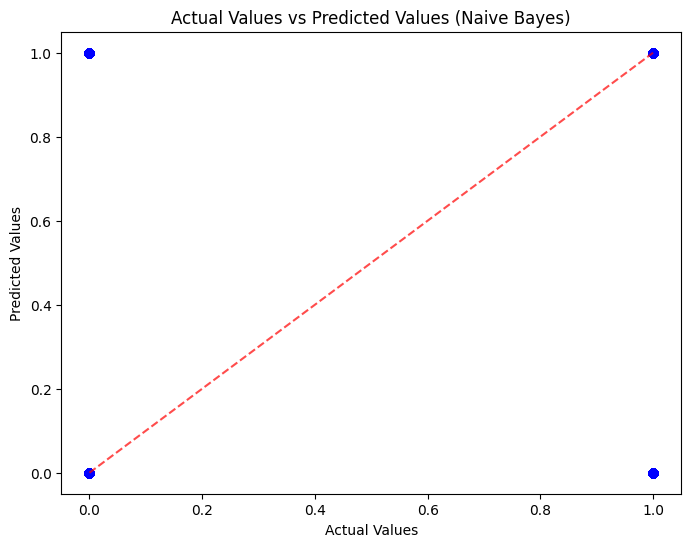

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_nb, color="blue", alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs Predicted Values (Naive Bayes)")
# Diagonal line representing perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", alpha=0.7, linestyle='--')
plt.show()

FINDING MODEL WITH GREATEST ACCURACY

In [ ]:
# Collect model performance
model_accuracies = {
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb)
}

# Find the best model
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model_name]

print(f"\nBest Model: {best_model_name} with accuracy: {best_accuracy:.4f}")



Best Model: Gradient Boosting with accuracy: 0.9725


SUGGESTIONS BASED ON HEALTH INDICATORS

In [ ]:
# Example patient suggestions based on health indicators
def suggest_lifestyle(age, bmi, smoking_history, blood_glucose_level):
    suggestions = []
    if bmi >= 25:
        suggestions.append("Consider a balanced diet and regular exercise to manage BMI.")
    if smoking_history == 1:  # Assuming 1 represents 'current smoker'
        suggestions.append("It's advisable to quit smoking for better health outcomes.")
    if blood_glucose_level > 125:
        suggestions.append("Consult a doctor to monitor blood glucose levels and manage diabetes risk.")
    return suggestions

# Display suggestions for a sample patient
print("\nLifestyle Suggestions:", suggest_lifestyle(54, 27.5, 1, 140))



Lifestyle Suggestions: ['Consider a balanced diet and regular exercise to manage BMI.', "It's advisable to quit smoking for better health outcomes.", 'Consult a doctor to monitor blood glucose levels and manage diabetes risk.']
